In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [ ]:
import keras
from keras.utils.np_utils import to_categorical

In [ ]:
image_dir = Path('../content/drive/MyDrive/fruitbox1')

getting file paths of the images into a list

In [ ]:
#filepaths = (pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath')).astype(str)
#ages = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Age').astype(np.int)
ages = pd.read_csv('/content/drive/MyDrive/csvsave.csv')
images = pd.concat([ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
ages

,filepath,weight,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,/content/drive/MyDrive/fruitbox1/Image_1.jpg,0.09,NaN,NaN,NaN
1,/content/drive/MyDrive/fruitbox1/Image_2.jpg,0.09,NaN,NaN,NaN
2,/content/drive/MyDrive/fruitbox1/Image_3.jpg,0.09,NaN,NaN,NaN
3,/content/drive/MyDrive/fruitbox1/Image_4.jpg,0.09,NaN,NaN,NaN
4,/content/drive/MyDrive/fruitbox1/Image_5.jpg,0.09,NaN,NaN,NaN
...,...,...,...,...,...
1071,/content/drive/MyDrive/fruitbox1/Image_1071.jpg,4.05,NaN,NaN,NaN
1072,/content/drive/MyDrive/fruitbox1/Image_1072.jpg,4.05,NaN,NaN,NaN
1073,/content/drive/MyDrive/fruitbox1/Image_1073.jpg,4.05,NaN,NaN,NaN
1074,/content/drive/MyDrive/fruitbox1/Image_1074.jpg,4.05,NaN,NaN,NaN


priting the list

In [ ]:
# Let's only use 5000 images to speed up training time
#image_df = images.sample(50, random_state=1).reset_index(drop=True)

train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
train_df

,filepath,weight,Unnamed: 2,Unnamed: 3,Unnamed: 4
819,/content/drive/MyDrive/fruitbox1/Image_574.jpg,1.020,NaN,NaN,NaN
1010,/content/drive/MyDrive/fruitbox1/Image_774.jpg,3.180,NaN,NaN,NaN
579,/content/drive/MyDrive/fruitbox1/Image_894.jpg,4.050,NaN,NaN,NaN
345,/content/drive/MyDrive/fruitbox1/Image_977.jpg,1.725,NaN,NaN,NaN
403,/content/drive/MyDrive/fruitbox1/Image_704.jpg,2.550,NaN,NaN,NaN
...,...,...,...,...,...
847,/content/drive/MyDrive/fruitbox1/Image_271.jpg,0.460,NaN,NaN,NaN
715,/content/drive/MyDrive/fruitbox1/Image_794.jpg,3.265,NaN,NaN,NaN
905,/content/drive/MyDrive/fruitbox1/Image_869.jpg,3.830,NaN,NaN,NaN
235,/content/drive/MyDrive/fruitbox1/Image_511.jpg,2.030,NaN,NaN,NaN


In [ ]:
test_df

,filepath,weight,Unnamed: 2,Unnamed: 3,Unnamed: 4
776,/content/drive/MyDrive/fruitbox1/Image_809.jpg,3.335,NaN,NaN,NaN
683,/content/drive/MyDrive/fruitbox1/Image_1037.jpg,3.200,NaN,NaN,NaN
912,/content/drive/MyDrive/fruitbox1/Image_535.jpg,0.810,NaN,NaN,NaN
215,/content/drive/MyDrive/fruitbox1/Image_906.jpg,4.050,NaN,NaN,NaN
1075,/content/drive/MyDrive/fruitbox1/Image_1061.jpg,3.825,NaN,NaN,NaN
...,...,...,...,...,...
250,/content/drive/MyDrive/fruitbox1/Image_923.jpg,0.335,NaN,NaN,NaN
282,/content/drive/MyDrive/fruitbox1/Image_666.jpg,2.115,NaN,NaN,NaN
268,/content/drive/MyDrive/fruitbox1/Image_566.jpg,0.950,NaN,NaN,NaN
1018,/content/drive/MyDrive/fruitbox1/Image_694.jpg,2.450,NaN,NaN,NaN


In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

flow the images through the genarator

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='weight',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=8,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='weight',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=8,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='weight',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=8,
    shuffle=False
)

Found 602 validated image filenames.
Found 150 validated image filenames.
Found 321 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:991: UserWarning: Found 1 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  n_invalid, x_col))
/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:991: UserWarning: Found 2 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  n_invalid, x_col))


In [ ]:
test_images

training

In [ ]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496 

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = (120, 120, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(n_classes, activation='softmax'))
model.add(Dense(1, activation='linear'))
learning_rate = 0.001
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 batch_normalization_4 (Batc  (None, 118, 118, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 116, 116, 16)      2320      
                                                                 
 batch_normalization_5 (Batc  (None, 116, 116, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 58, 58, 16)       0         
 2D)                                                             
                                                      

In [ ]:
model = Sequential()
model.add(ResNet50(include_top=True, weights='imagenet', input_shape=(224, 224, 3), pooling='avg'))
model.add(Dense(1, activation='linear'))
model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 25,637,713
Trainable params: 25,584,593
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss='mse',

)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
76/76 [==============================] - 711s 9s/step - loss: 4.8815 - val_loss: 4.4076
Epoch 2/100
76/76 [==============================] - 139s 2s/step - loss: 4.2952 - val_loss: 3.8966
Epoch 3/100
76/76 [==============================] - 139s 2s/step - loss: 3.8248 - val_loss: 3.4727
Epoch 4/100
76/76 [==============================] - 138s 2s/step - loss: 3.4237 - val_loss: 3.1038
Epoch 5/100
76/76 [==============================] - 138s 2s/step - loss: 3.0779 - val_loss: 2.7904
Epoch 6/100
76/76 [==============================] - 137s 2s/step - loss: 2.7843 - val_loss: 2.5211
Epoch 7/100
76/76 [==============================] - 138s 2s/step - loss: 2.5328 - val_loss: 2.2957
Epoch 8/100
76/76 [==============================] - 137s 2s/step - loss: 2.3222 - val_loss: 2.1083
Epoch 9/100
76/76 [==============================] - 138s 2s/step - loss: 2.1446 - val_loss: 1.9528
Epoch 10/100
76/76 [==============================] - 135s 2s/step - loss: 1.9996 - val_loss: 1.8209

results

In [ ]:
predicted_weight = np.squeeze(model.predict(test_images))
true_ages = test_images.labels

mse = model.evaluate(test_images, verbose=0)
print("     Test MSE: {:.5f}".format(mse))

r2 = r2_score(true_ages, predicted_weight)
print("Test R^2 Score: {:.5f}".format(r2))

41/41 [==============================] - 299s 7s/step
     Test MSE: 1.40912
Test R^2 Score: -0.00465


In [ ]:
null_rmse = np.sqrt(np.sum((true_ages - np.mean(true_ages))**2) / len(true_ages))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 1.18431


In [ ]:
import matplotlib.pyplot as plt

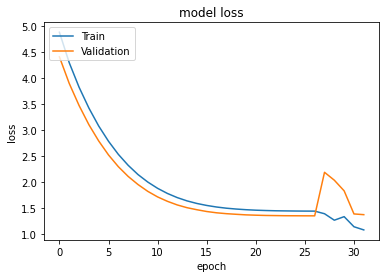

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
img="/content/drive/MyDrive/fruitbox1/Image_100.jpg"

img1 = image.load_img(img, target_size=(224, 224,3))
img_array = image.img_to_array(img1)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

In [ ]:
img

'/content/drive/MyDrive/fruitbox1/Image_100.jpg'

In [ ]:
y=model.predict(img_preprocessed)

1/1 [==============================] - 8s 8s/step


In [ ]:
print(y)

[[1.9812329]]


In [ ]:
x=model.predict(img_preprocessed)

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(x)

[[1.9812329]]


In [ ]:
input_folder='/content/drive/MyDrive/fruitbox1'

In [ ]:
model.save('/content/drive/MyDrive/model/new2.h5')

In [ ]:
import tensorflow as tf


In [ ]:
model.save_weights('qty.h5')

In [ ]:
model.load_weights('/content/drive/MyDrive/model/new1.h5')

In [ ]:
y=model.predict(img_preprocessed)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(y)

[[1.8933686]]


In [ ]:
print(accuracy_score(ytest, model.predict(xtest)))

In [ ]:
model.predict(val_images)

In [ ]:
val_images